In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from xgboost import XGBClassifier


In [2]:
# Load dataset
df = pd.read_csv(r"C:\Users\AB92922\Downloads\news.csv", index_col=None)
dataset = df.drop("Unnamed: 0", axis=1)

In [3]:
# Split dataset into features and target
y = dataset["label"]
X_train, X_test, y_train, y_test = train_test_split(dataset['text'], y, test_size=0.33, random_state=42)

In [4]:
# Text preprocessing with CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression
from sklearn.metrics import classification_report, accuracy_score

# Encode the target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Logistic Regression Classifier
log_reg = LogisticRegression(random_state=42, max_iter=1000)  # Initialize Logistic Regression

# Train the model
log_reg.fit(count_train.astype('float32'), y_train_encoded)

# Make predictions
y_pred_log_reg = log_reg.predict(count_test.astype('float32'))

# Decode the predicted labels back to original form
y_pred_log_reg_decoded = label_encoder.inverse_transform(y_pred_log_reg)

# Evaluate the model
print("Classification Report for Logistic Regression Classifier:")
print(classification_report(y_test, y_pred_log_reg_decoded))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred_log_reg_decoded)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")


Classification Report for Logistic Regression Classifier:
              precision    recall  f1-score   support

        FAKE       0.91      0.92      0.91      1071
        REAL       0.92      0.90      0.91      1020

    accuracy                           0.91      2091
   macro avg       0.91      0.91      0.91      2091
weighted avg       0.91      0.91      0.91      2091

Logistic Regression Accuracy: 0.9120


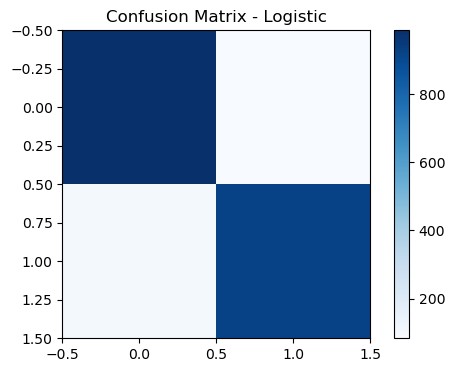

In [6]:
# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred_log_reg_decoded)
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic')
plt.colorbar()
plt.show()

In [7]:
# Make predictions using the trained Logistic Regression model
y_pred_logrec = log_reg.predict(count_test)

# Display first 10 predictions
print("First 10 predictions:", y_pred_log_reg_decoded[:10])

# Display corresponding true labels for comparison
print("True labels for the first 10 samples:", y_test[:10].values)


First 10 predictions: ['FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'REAL' 'FAKE' 'REAL' 'FAKE']
True labels for the first 10 samples: ['FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'REAL' 'FAKE' 'REAL' 'FAKE']
